# 1.5 Supervised Learning Algorithms

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
#Import the 'pleasant weather' answers dataset
df_answers = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [5]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#Import the scaled dataset from last exercise
df_weather = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/weather_cleaned.csv')

In [7]:
df_weather.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,1960-01-01
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,1960-01-02
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,1960-01-03
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,1960-01-04
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,1960-01-05


In [8]:
#Print list of column names to ensure Gdansk, Rome, and Tours have been removed
print(list(df_weather.columns))

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_ma

Unnecessary Columns from Gdansk, Rome, and Tours have already been dropped from the dataset.

In [10]:
#Create an 'X' and y df by dropping the unneeded columns
X = df_weather.drop(['DATE'], axis=1)
y = df_answers.drop(['DATE'],axis=1)

In [11]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
#View the shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 135)
(5738, 135)
(17212, 15)
(5738, 15)


In [13]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
X_train

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,0.69,1.0131,2.45,0.06,6.9,20.4,13.6,26.9,3,...,11.9,6,0.83,1.0082,1.13,0.28,2.1,15.6,13.7,17.6
20472,8,0.82,1.0166,0.58,0.09,0.0,-1.8,-3.2,-0.5,1,...,-4.6,5,0.82,1.0142,0.23,0.41,3.4,10.7,7.9,13.5
18269,7,0.84,1.0097,0.41,0.07,0.6,-1.8,-6.0,0.7,7,...,-5.5,5,0.90,1.0186,0.43,0.03,3.2,1.0,-3.9,5.9
7713,2,0.74,1.0207,0.80,0.00,3.5,-1.4,-3.8,2.1,8,...,-1.5,8,0.91,1.0032,0.19,1.58,0.0,6.8,5.5,9.6
21958,7,0.69,1.0135,0.58,1.18,0.5,6.1,1.8,13.5,1,...,3.5,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,8,0.90,1.0017,0.59,0.05,0.6,13.3,12.1,16.0,5,...,10.1,6,0.85,1.0170,1.15,0.08,3.8,11.6,10.0,13.3
21575,6,0.86,1.0153,1.02,0.08,0.1,1.0,-0.9,3.2,7,...,-1.9,5,0.82,1.0142,0.33,0.41,3.4,10.7,7.9,13.5
5390,6,0.82,1.0180,0.98,0.00,2.4,6.3,3.5,11.9,3,...,10.0,6,0.74,1.0230,1.05,0.33,3.3,9.6,7.8,11.5
860,7,0.70,1.0180,2.26,0.36,5.6,10.1,8.2,15.7,4,...,13.2,7,0.86,1.0124,2.02,0.11,4.4,11.1,8.5,13.7


[Text(0.3683982555507055, 0.9807692307692307, 'x[44] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06400759067593319, 0.9423076923076923, 'x[89] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.21620292311331935, 0.9615384615384615, 'True  '),
 Text(0.018254288975190564, 0.9038461538461539, 'x[17] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.

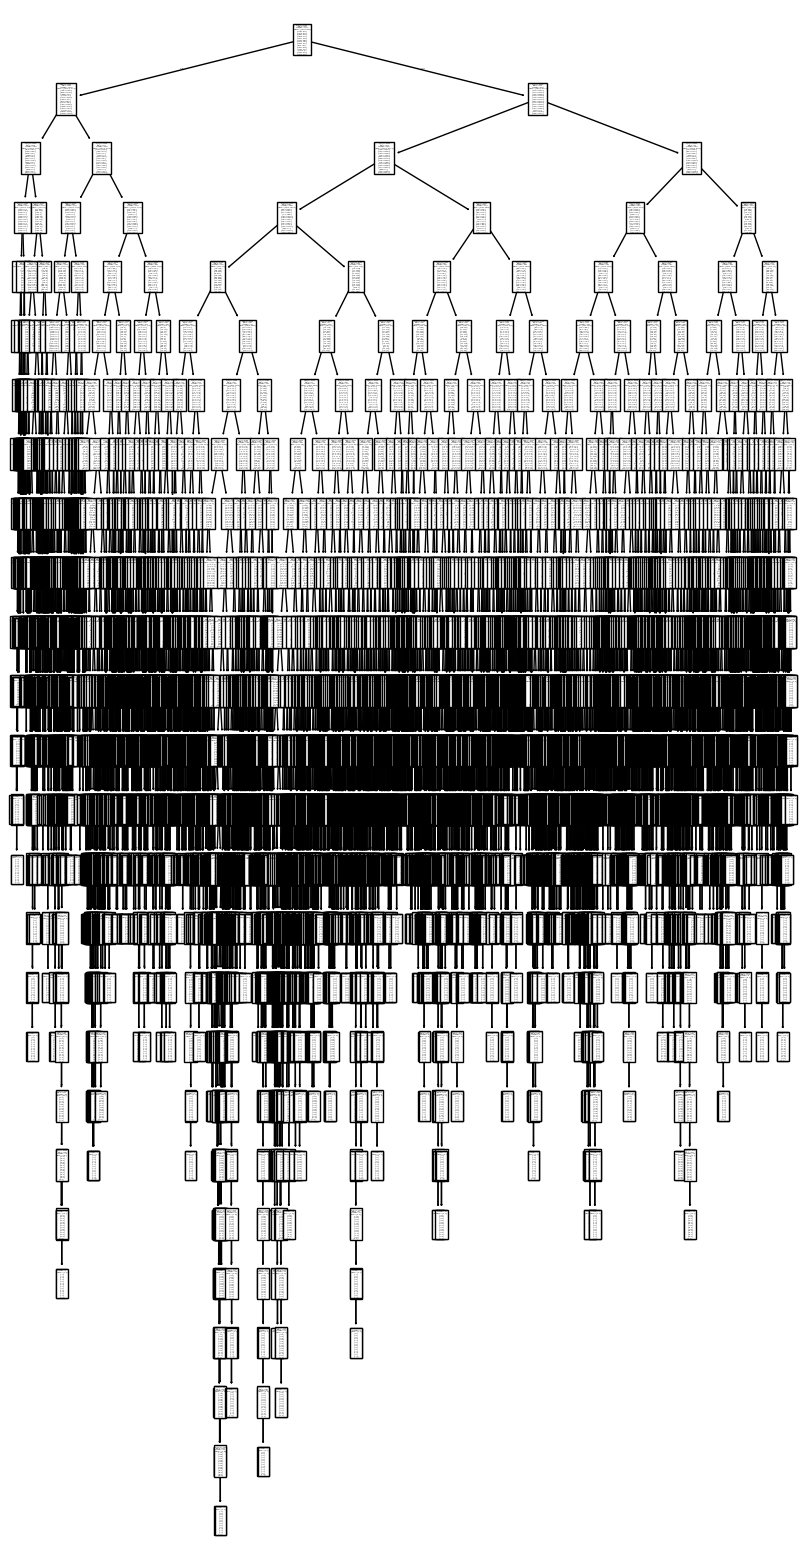

In [15]:
#Run the Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [22]:
#Cross validation method
y_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6060306904893296


In [17]:
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4264
           1       1.00      1.00      1.00      6030
           2       1.00      1.00      1.00      5593
           3       1.00      1.00      1.00      3358
           4       1.00      1.00      1.00      3703
           5       1.00      1.00      1.00      3791
           6       1.00      1.00      1.00      2851
           7       1.00      1.00      1.00      4833
           8       1.00      1.00      1.00      3590
           9       1.00      1.00      1.00      7677
          10       1.00      1.00      1.00      3575
          11       1.00      1.00      1.00      2720
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2922
          14       1.00      1.00      1.00       898

   micro avg       1.00      1.00      1.00     55805
   macro avg       0.93      0.93      0.93     55805
weighted avg       1.00   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pac

In [26]:
y_pred_test = activedt.predict(X_test)

In [28]:
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


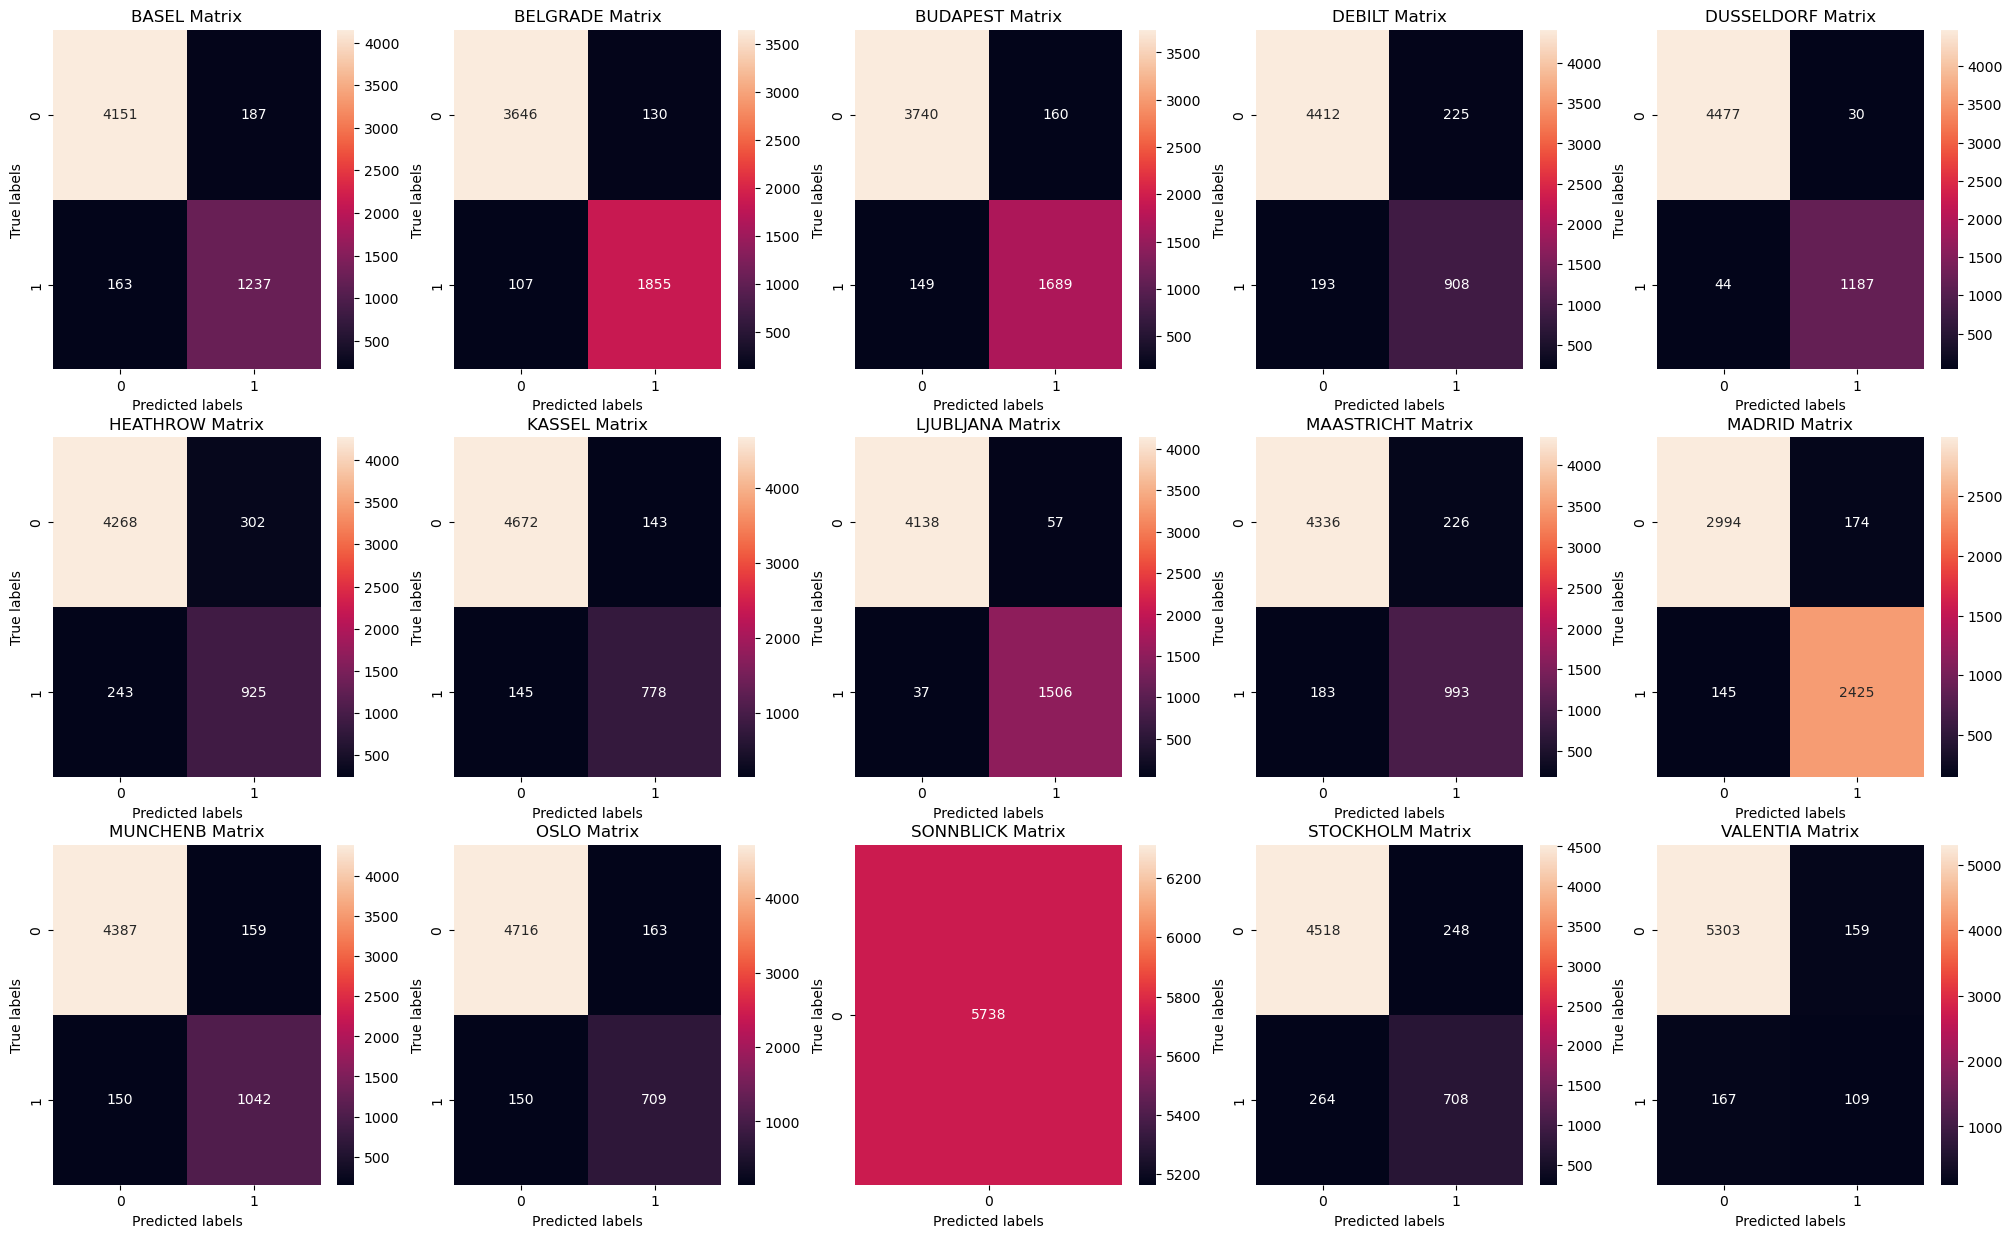

In [30]:
#Create the confusion matrix
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1